<a href="https://colab.research.google.com/github/AllysonAbreu/dw_contas_publicas_2022/blob/master/dea_receitas_dados_novos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports e instalações

In [687]:
# instalações das bibliotecas
!pip install basedosdados

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [688]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import basedosdados as bd
from google.colab import auth
from google.cloud import bigquery

# Imports dos dados

## Login no gcloud

In [689]:
auth.authenticate_user()

project = 'dados-ibge-384913'
location = 'US'
client = bigquery.Client(project=project, location=location)

## Querys para buscar no firebase

In [690]:
query_populacao = "SELECT db.ano, db.populacao FROM `basedosdados.br_ibge_populacao.municipio` as db WHERE db.id_municipio = '2503704'"
query_pib_1999_2012 = "SELECT * FROM `basedosdados.br_ibge_pib.municipio_antigo` as db WHERE db.id_municipio = '2503704'"
query_pib_2002_2020 = "SELECT * FROM `basedosdados.br_ibge_pib.municipio` as db WHERE db.id_municipio = '2503704'"

## Import dos dados do IBGE

### Dados sobre a população

In [691]:
# Para carregar os dados do firebase direto no pandas
df_ibge_populacao = client.query(query_populacao).to_dataframe()

### Dados sobre o pib

<p>id_municipio	STRINGID Município - IBGE 7 Dígitos</p>
<p>ano	INTEGER	Ano</p>
<p>pib	INTEGER	Produto Interno Bruto</p>
<p>impostos_liquidos	INTEGER Impostos, líquidos de subsídios, sobre produtos</p>
<p>va	INTEGER	Valor adicionado bruto</p>
<p>va_agropecuaria	INTEGER Valor adicionado bruto da agropecuária</p>
<p>va_industria	INTEGER	Valor adicionado bruto da indústria</p>
<p>va_servicos	INTEGER Valor adicionado bruto dos serviços, exclusive administração, defesa, educação e saúde públicas e seguridade social</p>
<p>va_adespss	INTEGER	Valor adicionado bruto da administração, defesa, educação e saúde públicas e seguridade social</p>



In [692]:
# Para carregar os dados do firebase direto no pandas
df_ibge_pib_1999_2012 = client.query(query_pib_1999_2012).to_dataframe()
df_ibge_pib_1999_2012

,id_municipio,ano,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2503704,1999,137678000,18381000,119298000,4042000,15236000,100020000,31895000
1,2503704,2000,147505000,21854000,125651000,4036000,16710000,104905000,32198000
2,2503704,2001,161616000,23191000,138425000,2874000,19319000,116231000,44545000
3,2503704,2002,163999000,21171000,142828000,5694000,21845000,115289000,45919000
4,2503704,2003,203900000,30241000,173660000,5825000,22009000,145825000,54264000
5,2503704,2004,224386000,28835000,195551000,4750000,27958000,162843000,60249000
6,2503704,2005,227714000,25497000,202217000,3822000,30614000,167780000,68967000
7,2503704,2006,300007000,36316000,263692000,5136000,40493000,218063000,79946000
8,2503704,2007,369493000,45672000,323821000,4404000,50824000,268593000,89118000
9,2503704,2008,399841000,48576000,351265000,5645000,52290000,293330000,101182000


In [693]:
# Para carregar os dados do firebase direto no pandas
df_ibge_pib_2002_2020 = client.query(query_pib_2002_2020).to_dataframe()
df_ibge_pib_2002_2020

,id_municipio,ano,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2503704,2002,177049275,2897748,148071794,6171138,15082778,75397206,51420672
1,2503704,2003,224786728,35319092,189467636,6403772,16323628,105151942,61588293
2,2503704,2004,251046627,33342224,217704403,5921732,22212434,122077465,67492773
3,2503704,2005,271853716,34917409,236936307,5411566,22964689,131282173,7727788
4,2503704,2006,342557444,4535936,297198084,6570423,25876534,173747873,91003255
5,2503704,2007,405481057,52878472,352602584,5833151,35700733,210833472,100235228
6,2503704,2008,449803882,57799257,392004625,7172882,33662815,234358517,11681041
7,2503704,2009,484350702,64634475,419716226,8243712,37063349,253310493,121098672
8,2503704,2010,545321165,71900364,4734208,7449096,64137889,250045077,151788739
9,2503704,2011,614599514,83189966,531409549,12218575,71341656,282325974,165523343


In [694]:
# Merge com indicador
df_ibge_pib = pd.merge(df_ibge_pib_1999_2012.head(3), df_ibge_pib_2002_2020, how='outer', indicator=True)

# Remover a coluna indicadora
df_ibge_pib = df_ibge_pib.drop(columns=['_merge'])

df_ibge_pib


,id_municipio,ano,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2503704,1999,137678000,18381000,119298000,4042000,15236000,100020000,31895000
1,2503704,2000,147505000,21854000,125651000,4036000,16710000,104905000,32198000
2,2503704,2001,161616000,23191000,138425000,2874000,19319000,116231000,44545000
3,2503704,2002,177049275,2897748,148071794,6171138,15082778,75397206,51420672
4,2503704,2003,224786728,35319092,189467636,6403772,16323628,105151942,61588293
5,2503704,2004,251046627,33342224,217704403,5921732,22212434,122077465,67492773
6,2503704,2005,271853716,34917409,236936307,5411566,22964689,131282173,7727788
7,2503704,2006,342557444,4535936,297198084,6570423,25876534,173747873,91003255
8,2503704,2007,405481057,52878472,352602584,5833151,35700733,210833472,100235228
9,2503704,2008,449803882,57799257,392004625,7172882,33662815,234358517,11681041


## Import dos dados em .csv

In [695]:
df_receitas = pd.read_csv('dados_receitas.csv', sep=';')
df_receitas.head(1)

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS
0,1722010101,2013-01-03,886cd0eabf5a18,185560.68,prefeitura municipal


## Conversões nos dados

### Conversão e tratamento dos dados nas colunas do DF df_ibge_pib

In [696]:
# dados antes da conversão
df_ibge_pib.dtypes

id_municipio         object
ano                   int64
pib                   int64
impostos_liquidos     int64
va                    int64
va_agropecuaria       int64
va_industria          int64
va_servicos           int64
va_adespss            int64
dtype: object

In [697]:
# Definindo a função para modificar os valores das células
def modify_cells(x):
    try:
        x = str(x)
        return float(x[:-2] + '.' + x[-2:])
    except ValueError:
        return x

In [698]:
# dados das colunas numéricas inteiras após a conversão
list_columns_pib = ['pib', 'impostos_liquidos', 'va', 'va_agropecuaria', 'va_industria', 'va_servicos', 'va_adespss']

# Aplicando a função em todas as células do DataFrame
df_ibge_pib[list_columns_pib] = df_ibge_pib[list_columns_pib].applymap(modify_cells)

# Verificando o tipo de dados do DataFrame após a modificação
df_ibge_pib.dtypes

id_municipio          object
ano                    int64
pib                  float64
impostos_liquidos    float64
va                   float64
va_agropecuaria      float64
va_industria         float64
va_servicos          float64
va_adespss           float64
dtype: object

In [699]:
# corrigindo o valor do PIB de 2020
dic_column_correct = {'id_municipio':'2503704',
                      'ano':2020,
                      'pib':1055820.97,
                      'impostos_liquidos':149580.22,
                      'va':984890.38,
                      'va_agropecuaria':16844.65,
                      'va_industria':98240.13,
                      'va_servicos':567634.70,
                      'va_adespss':302170.90}

# alterando dados da última linha para os mais atualizados segundo o ibge
df_ibge_pib.loc[21] = dic_column_correct
df_ibge_pib

,id_municipio,ano,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2503704,1999,1376780.00,183810.00,1192980.00,40420.00,152360.00,1000200.00,318950.00
1,2503704,2000,1475050.00,218540.00,1256510.00,40360.00,167100.00,1049050.00,321980.00
2,2503704,2001,1616160.00,231910.00,1384250.00,28740.00,193190.00,1162310.00,445450.00
3,2503704,2002,1770492.75,28977.48,1480717.94,61711.38,150827.78,753972.06,514206.72
4,2503704,2003,2247867.28,353190.92,1894676.36,64037.72,163236.28,1051519.42,615882.93
5,2503704,2004,2510466.27,333422.24,2177044.03,59217.32,222124.34,1220774.65,674927.73
6,2503704,2005,2718537.16,349174.09,2369363.07,54115.66,229646.89,1312821.73,77277.88
7,2503704,2006,3425574.44,45359.36,2971980.84,65704.23,258765.34,1737478.73,910032.55
8,2503704,2007,4054810.57,528784.72,3526025.84,58331.51,357007.33,2108334.72,1002352.28
9,2503704,2008,4498038.82,577992.57,3920046.25,71728.82,336628.15,2343585.17,116810.41


In [700]:
# dados da coluna ano após a conversão
df_ibge_pib['ano'] = pd.to_datetime(df_ibge_pib['ano'], format='%Y')
df_ibge_pib.dtypes

id_municipio                 object
ano                  datetime64[ns]
pib                         float64
impostos_liquidos           float64
va                          float64
va_agropecuaria             float64
va_industria                float64
va_servicos                 float64
va_adespss                  float64
dtype: object

### Conversão e tratamento dos dados da coluna tempo do DF dados_receitas

In [701]:
# dados antes da conversão
df_receitas.dtypes

COD_RECEITA           int64
DATA                 object
COD_CONTRIBUINTE     object
VALOR_ARRECADADO    float64
FONTE_DADOS          object
dtype: object

In [702]:
# dados após a conversão
df_receitas['DATA'] = pd.to_datetime(df_receitas['DATA'])
df_receitas.dtypes

COD_RECEITA                  int64
DATA                datetime64[ns]
COD_CONTRIBUINTE            object
VALOR_ARRECADADO           float64
FONTE_DADOS                 object
dtype: object

### Conversão na coluna ano do DF df_ibge_populacao

In [703]:
# dados originais
df_ibge_populacao.dtypes

ano          int64
populacao    int64
dtype: object

In [704]:
# dados apos conversao para dt
df_ibge_populacao['ano'] = pd.to_datetime(df_ibge_populacao['ano'], format='%Y')
df_ibge_populacao

,ano,populacao
0,1991-01-01,51273
1,1992-01-01,51530
2,1993-01-01,51965
3,1994-01-01,52279
4,1995-01-01,52586
5,1996-01-01,51396
6,1997-01-01,51575
7,1998-01-01,51726
8,1999-01-01,51878
9,2000-01-01,54715


In [705]:
# dados apos a conversao
df_ibge_populacao.dtypes

ano          datetime64[ns]
populacao             int64
dtype: object

# Análises

## Visual - Plot dos gráficos

### Time series da população cajezeirense entre 1991 e 2021

In [706]:
df_ibge_populacao_index_ano = df_ibge_populacao.set_index('ano')

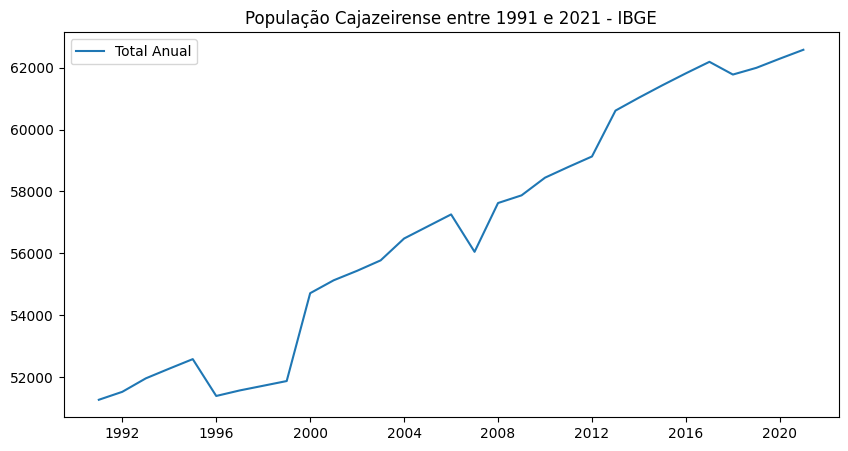

In [707]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_ibge_populacao_index_ano.index, df_ibge_populacao_index_ano['populacao'], label='Total Anual')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('População Cajazeirense entre 1991 e 2021 - IBGE')

# Exibe o gráfico
plt.show()

In [708]:
df_ibge_populacao_index_ano['variacao_anual'] = df_ibge_populacao_index_ano['populacao'].diff()
df_ibge_populacao_index_ano['porcentagem_variacao_anual_%'] = ((df_ibge_populacao_index_ano['variacao_anual'] / df_ibge_populacao_index_ano['populacao'].shift(1)) * 100).round(2)
df_ibge_populacao_index_ano['aceleracao_variacao_anual'] = df_ibge_populacao_index_ano['variacao_anual'].diff()
df_ibge_populacao_index_ano['porcentagem_aceleracao_variacao_anual_%'] = ((df_ibge_populacao_index_ano['aceleracao_variacao_anual'] / df_ibge_populacao_index_ano['variacao_anual'].shift(1)) * 100).round(2)
df_ibge_populacao_index_ano

,populacao,variacao_anual,porcentagem_variacao_anual_%,aceleracao_variacao_anual,porcentagem_aceleracao_variacao_anual_%
ano,,,,,
1991-01-01,51273,NaN,NaN,NaN,NaN
1992-01-01,51530,257.00,0.50,NaN,NaN
1993-01-01,51965,435.00,0.84,178.00,69.26
1994-01-01,52279,314.00,0.60,-121.00,-27.82
1995-01-01,52586,307.00,0.59,-7.00,-2.23
1996-01-01,51396,-1190.00,-2.26,-1497.00,-487.62
1997-01-01,51575,179.00,0.35,1369.00,-115.04
1998-01-01,51726,151.00,0.29,-28.00,-15.64
1999-01-01,51878,152.00,0.29,1.00,0.66


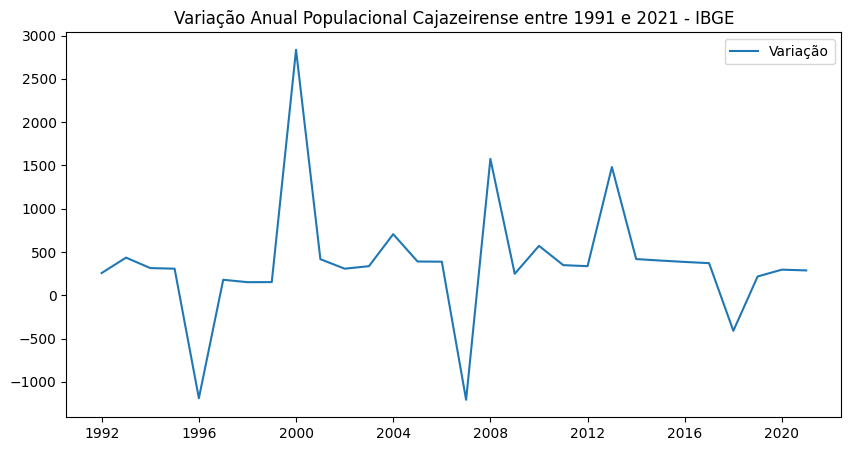

In [709]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_ibge_populacao_index_ano.index, df_ibge_populacao_index_ano['variacao_anual'], label='Variação')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação Anual Populacional Cajazeirense entre 1991 e 2021 - IBGE')

# Exibe o gráfico
plt.show()

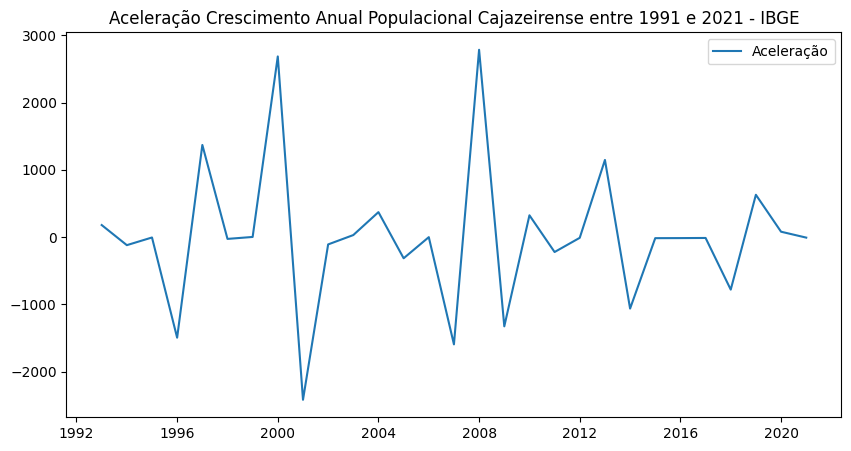

In [710]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_ibge_populacao_index_ano.index, df_ibge_populacao_index_ano['aceleracao_variacao_anual'], label='Aceleração')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração Crescimento Anual Populacional Cajazeirense entre 1991 e 2021 - IBGE')

# Exibe o gráfico
plt.show()

In [711]:
print(f"Total da variação populacional entre 1991 e 2021: {df_ibge_populacao_index_ano['variacao_anual'].sum()}")
print(f"Média móvel da variação anual: {(df_ibge_populacao_index_ano['variacao_anual'].sum()/df_ibge_populacao_index_ano.shape[0]).round(2)}")

Total da variação populacional entre 1991 e 2021: 11303.0
Média móvel da variação anual: 364.61


In [712]:
print(f"Total da aceleração da variação populacional entre 1991 e 2021: {df_ibge_populacao_index_ano['aceleracao_variacao_anual'].sum()}")
print(f"Média móvel anual da aceleração da variação populacional entre 1991 e 2021: {(df_ibge_populacao_index_ano['aceleracao_variacao_anual'].sum()/df_ibge_populacao_index_ano.shape[0]).round(2)}")

Total da aceleração da variação populacional entre 1991 e 2021: 30.0
Média móvel anual da aceleração da variação populacional entre 1991 e 2021: 0.97


In [713]:
print(f"Porcentagem da variação populacional entre 1991 e 2021: {df_ibge_populacao_index_ano['porcentagem_variacao_anual_%'].sum().round(2)}%")
print(f"Média percentual móvel anual da variação populacional entre 1991 e 2021: {(df_ibge_populacao_index_ano['porcentagem_variacao_anual_%'].sum()/df_ibge_populacao_index_ano.shape[0]).round(2)}%")

Porcentagem da variação populacional entre 1991 e 2021: 20.25%
Média percentual móvel anual da variação populacional entre 1991 e 2021: 0.65%


In [714]:
print(f"Porcentagem da aceleração da variação populacional entre 1991 e 2021: {df_ibge_populacao_index_ano['porcentagem_aceleracao_variacao_anual_%'].sum().round(2)}%")
print(f"Média percentual móvel anual da aceleração da variação populacional entre 1991 e 2021: {(df_ibge_populacao_index_ano['porcentagem_aceleracao_variacao_anual_%'].sum()/df_ibge_populacao_index_ano.shape[0]).round(2)}%")

Porcentagem da aceleração da variação populacional entre 1991 e 2021: 439.69%
Média percentual móvel anual da aceleração da variação populacional entre 1991 e 2021: 14.18%


### Time series do pib entre 1999 e 2020

In [715]:
# verificando se há valores nulos
df_ibge_pib.isna().value_counts()

id_municipio  ano    pib    impostos_liquidos  va     va_agropecuaria  va_industria  va_servicos  va_adespss
False         False  False  False              False  False            False         False        False         22
dtype: int64

In [716]:
# verificando o tipo das colunas
df_ibge_pib.dtypes

id_municipio                 object
ano                  datetime64[ns]
pib                         float64
impostos_liquidos           float64
va                          float64
va_agropecuaria             float64
va_industria                float64
va_servicos                 float64
va_adespss                  float64
dtype: object

In [717]:
# criando df para analises dos dados
df_receitas_analise = df_ibge_pib[['ano','pib', 'impostos_liquidos', 'va', 'va_agropecuaria', 'va_industria', 'va_servicos', 'va_adespss']]

df_receitas_analise.set_index('ano', inplace=True)
df_receitas_analise

,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
ano,,,,,,,
1999-01-01,1376780.00,183810.00,1192980.00,40420.00,152360.00,1000200.00,318950.00
2000-01-01,1475050.00,218540.00,1256510.00,40360.00,167100.00,1049050.00,321980.00
2001-01-01,1616160.00,231910.00,1384250.00,28740.00,193190.00,1162310.00,445450.00
2002-01-01,1770492.75,28977.48,1480717.94,61711.38,150827.78,753972.06,514206.72
2003-01-01,2247867.28,353190.92,1894676.36,64037.72,163236.28,1051519.42,615882.93
2004-01-01,2510466.27,333422.24,2177044.03,59217.32,222124.34,1220774.65,674927.73
2005-01-01,2718537.16,349174.09,2369363.07,54115.66,229646.89,1312821.73,77277.88
2006-01-01,3425574.44,45359.36,2971980.84,65704.23,258765.34,1737478.73,910032.55
2007-01-01,4054810.57,528784.72,3526025.84,58331.51,357007.33,2108334.72,1002352.28


#### PIB

In [718]:
df_pib_analise = df_receitas_analise.copy()
df_pib_analise.drop(columns=['impostos_liquidos','va','va_agropecuaria','va_industria','va_servicos','va_adespss'], inplace=True)

pd.options.display.float_format = '{:.2f}'.format
print(df_pib_analise)

                   pib
ano                   
1999-01-01  1376780.00
2000-01-01  1475050.00
2001-01-01  1616160.00
2002-01-01  1770492.75
2003-01-01  2247867.28
2004-01-01  2510466.27
2005-01-01  2718537.16
2006-01-01  3425574.44
2007-01-01  4054810.57
2008-01-01  4498038.82
2009-01-01  4843507.02
2010-01-01  5453211.65
2011-01-01  6145995.14
2012-01-01  6885042.11
2013-01-01  7703394.57
2014-01-01  9046481.55
2015-01-01  9490252.62
2016-01-01  1039264.14
2017-01-01  1096132.93
2018-01-01 10642315.22
2019-01-01 11280580.14
2020-01-01  1055820.97


In [719]:
# inferindo variação e acelaração anual do pib
df_pib_analise['variacao_anual'] = df_pib_analise['pib'].diff()
df_pib_analise['porcentagem_variacao_anual_%'] = ((df_pib_analise['variacao_anual'] / df_pib_analise['pib'].shift(1)) * 100).round(2)
df_pib_analise['aceleracao_variacao_anual'] = df_pib_analise['variacao_anual'].diff()
df_pib_analise['porcentagem_aceleracao_variacao_anual_%'] = ((df_pib_analise['aceleracao_variacao_anual'] / df_pib_analise['variacao_anual'].shift(1)) * 100).round(2)
df_pib_analise

,pib,variacao_anual,porcentagem_variacao_anual_%,aceleracao_variacao_anual,porcentagem_aceleracao_variacao_anual_%
ano,,,,,
1999-01-01,1376780.00,NaN,NaN,NaN,NaN
2000-01-01,1475050.00,98270.00,7.14,NaN,NaN
2001-01-01,1616160.00,141110.00,9.57,42840.00,43.59
2002-01-01,1770492.75,154332.75,9.55,13222.75,9.37
2003-01-01,2247867.28,477374.53,26.96,323041.78,209.32
2004-01-01,2510466.27,262598.99,11.68,-214775.54,-44.99
2005-01-01,2718537.16,208070.89,8.29,-54528.10,-20.76
2006-01-01,3425574.44,707037.28,26.01,498966.39,239.81
2007-01-01,4054810.57,629236.13,18.37,-77801.15,-11.00


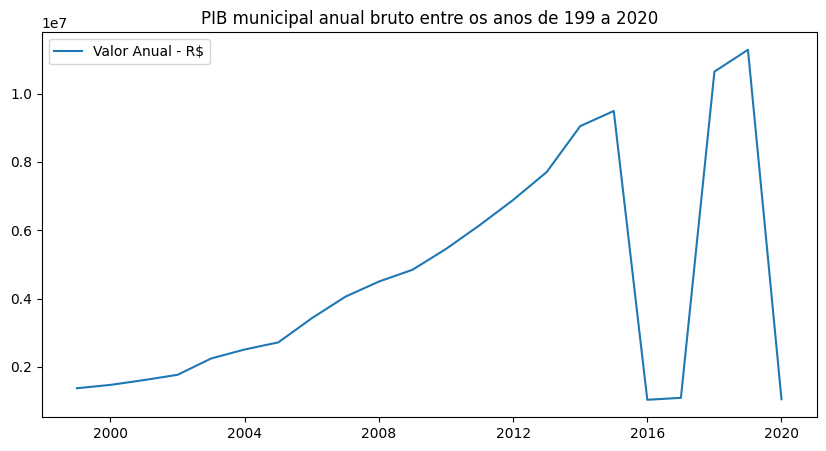

In [720]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_pib_analise.index, df_pib_analise['pib'], label='Valor Anual - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('PIB municipal anual bruto entre os anos de 199 a 2020')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

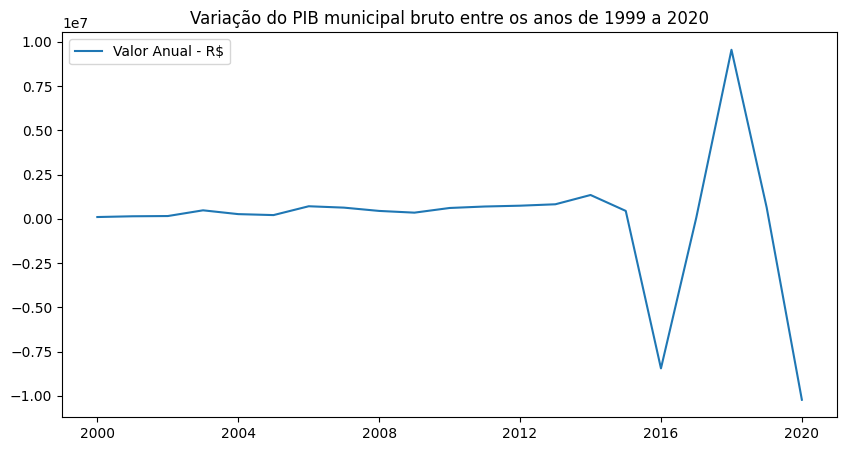

In [721]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_pib_analise.index, df_pib_analise['variacao_anual'], label='Valor Anual - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação do PIB municipal bruto entre os anos de 1999 a 2020')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

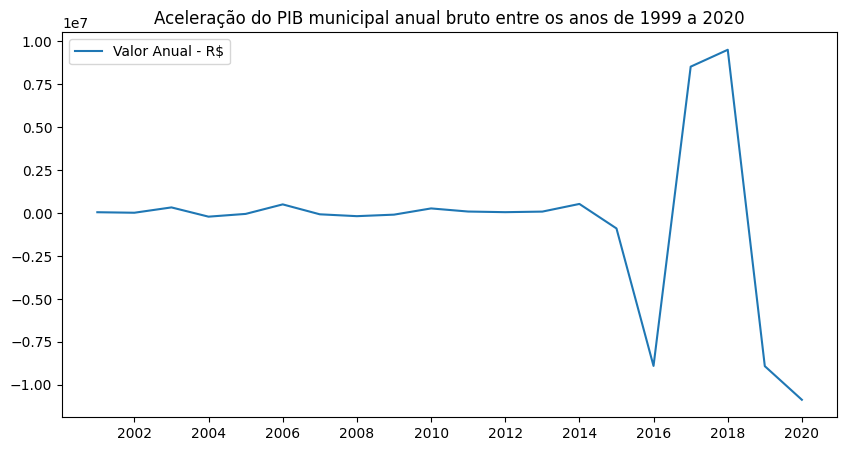

In [722]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_pib_analise.index, df_pib_analise['aceleracao_variacao_anual'], label='Valor Anual - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração do PIB municipal anual bruto entre os anos de 1999 a 2020')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

In [723]:
print(f"Total da variação do PIB municipal: R$ {df_pib_analise['variacao_anual'].sum().round(2)}")
print(f"Média móvel anual da variação do PIB municipal: R$ {(df_pib_analise['variacao_anual'].sum()/df_pib_analise.shape[0]).round(2)}")

Total da variação do PIB municipal: R$ -320959.03
Média móvel anual da variação do PIB municipal: R$ -14589.05


In [724]:
print(f"Total da aceleração da variação do PIB municipal: R$ {df_pib_analise['aceleracao_variacao_anual'].sum().round(2)}")
print(f"Média móvel anual da aceleração da variação do PIB municipal: R$ {(df_pib_analise['aceleracao_variacao_anual'].sum()/df_pib_analise.shape[0]).round(2)}")

Total da aceleração da variação do PIB municipal: R$ -10323029.17
Média móvel anual da aceleração da variação do PIB municipal: R$ -469228.6


In [725]:
print(f"Porcentagem da variação do PIB municipal: {df_pib_analise['porcentagem_variacao_anual_%'].sum().round(2)}%")
print(f"Média móvel percentual anual da variação do PIB municipal: {(df_pib_analise['porcentagem_variacao_anual_%'].sum()/df_pib_analise.shape[0]).round(2)}%")

Porcentagem da variação do PIB municipal: 910.41%
Média móvel percentual anual da variação do PIB municipal: 41.38%


In [726]:
print(f"Porcentagem da aceleração da variação do PIB municipal: {df_pib_analise['porcentagem_aceleracao_variacao_anual_%'].sum().round(2)}%")
print(f"Média móvel percentual anual da acelereção variação do PIB municipal: {(df_pib_analise['porcentagem_aceleracao_variacao_anual_%'].sum()/df_pib_analise.shape[0]).round(2)}%")

Porcentagem da aceleração da variação do PIB municipal: 13264.44%
Média móvel percentual anual da acelereção variação do PIB municipal: 602.93%


#### Valores brutos específicos

In [727]:
df_va_analise = df_receitas_analise.copy()
df_va_analise.drop(columns=['pib',	'impostos_liquidos'], inplace=True)

pd.options.display.float_format = '{:.2f}'.format
print(df_va_analise)

                   va  va_agropecuaria  va_industria  va_servicos  va_adespss
ano                                                                          
1999-01-01 1192980.00         40420.00     152360.00   1000200.00   318950.00
2000-01-01 1256510.00         40360.00     167100.00   1049050.00   321980.00
2001-01-01 1384250.00         28740.00     193190.00   1162310.00   445450.00
2002-01-01 1480717.94         61711.38     150827.78    753972.06   514206.72
2003-01-01 1894676.36         64037.72     163236.28   1051519.42   615882.93
2004-01-01 2177044.03         59217.32     222124.34   1220774.65   674927.73
2005-01-01 2369363.07         54115.66     229646.89   1312821.73    77277.88
2006-01-01 2971980.84         65704.23     258765.34   1737478.73   910032.55
2007-01-01 3526025.84         58331.51     357007.33   2108334.72  1002352.28
2008-01-01 3920046.25         71728.82     336628.15   2343585.17   116810.41
2009-01-01 4197162.26         82437.12     370633.49   2533104.9

In [728]:
# inferindo variação e acelaração anual dos valores brutos
df_va_analise['variacao_anual_va'] = df_va_analise['va'].diff()
df_va_analise['porcentagem_variacao_anual_va_%'] = ((df_va_analise['variacao_anual_va'] / df_va_analise['va'].shift(1)) * 100).round(2)
df_va_analise['aceleracao_variacao_anual_va'] = df_va_analise['variacao_anual_va'].diff()
df_va_analise['porcentagem_aceleracao_variacao_anual_va_%'] = ((df_va_analise['aceleracao_variacao_anual_va'] / df_va_analise['variacao_anual_va'].shift(1)) * 100).round(2)

In [729]:
# inferindo variação e acelaração anual dos valores brutos
df_va_analise['variacao_anual_va_agropecuaria'] = df_va_analise['va_agropecuaria'].diff()
df_va_analise['porcentagem_variacao_anual_va_agropecuaria_%'] = ((df_va_analise['variacao_anual_va_agropecuaria'] / df_va_analise['va_agropecuaria'].shift(1)) * 100).round(2)
df_va_analise['aceleracao_variacao_anual_va_agropecuaria'] = df_va_analise['variacao_anual_va_agropecuaria'].diff()
df_va_analise['porcentagem_aceleracao_variacao_anual_va_agropecuaria_%'] = ((df_va_analise['aceleracao_variacao_anual_va_agropecuaria'] / df_va_analise['variacao_anual_va_agropecuaria'].shift(1)) * 100).round(2)

In [730]:
# inferindo variação e acelaração anual dos valores brutos
df_va_analise['variacao_anual_va_industria'] = df_va_analise['va_industria'].diff()
df_va_analise['porcentagem_variacao_anual_va_industria_%'] = ((df_va_analise['variacao_anual_va_industria'] / df_va_analise['va_industria'].shift(1)) * 100).round(2)
df_va_analise['aceleracao_variacao_anual_va_industria'] = df_va_analise['variacao_anual_va_industria'].diff()
df_va_analise['porcentagem_aceleracao_variacao_anual_va_industria_%'] = ((df_va_analise['aceleracao_variacao_anual_va_industria'] / df_va_analise['variacao_anual_va_industria'].shift(1)) * 100).round(2)

In [731]:
# inferindo variação e acelaração anual dos valores brutos
df_va_analise['variacao_anual_va_servicos'] = df_va_analise['va_servicos'].diff()
df_va_analise['porcentagem_variacao_anual_va_servicos_%'] = ((df_va_analise['variacao_anual_va_servicos'] / df_va_analise['va_servicos'].shift(1)) * 100).round(2)
df_va_analise['aceleracao_variacao_anual_va_servicos'] = df_va_analise['variacao_anual_va_servicos'].diff()
df_va_analise['porcentagem_aceleracao_variacao_anual_va_servicos_%'] = ((df_va_analise['aceleracao_variacao_anual_va_servicos'] / df_va_analise['variacao_anual_va_servicos'].shift(1)) * 100).round(2)

In [732]:
# inferindo variação e acelaração anual dos valores brutos
df_va_analise['variacao_anual_va_adespss'] = df_va_analise['va_adespss'].diff()
df_va_analise['porcentagem_variacao_anual_va_adespss_%'] = ((df_va_analise['variacao_anual_va_adespss'] / df_va_analise['va_adespss'].shift(1)) * 100).round(2)
df_va_analise['aceleracao_variacao_anual_va_adespss'] = df_va_analise['variacao_anual_va_adespss'].diff()
df_va_analise['porcentagem_aceleracao_variacao_anual_va_adespss_%'] = ((df_va_analise['aceleracao_variacao_anual_va_adespss'] / df_va_analise['variacao_anual_va_adespss'].shift(1)) * 100).round(2)
df_va_analise

,va,va_agropecuaria,va_industria,va_servicos,va_adespss,variacao_anual_va,porcentagem_variacao_anual_va_%,aceleracao_variacao_anual_va,porcentagem_aceleracao_variacao_anual_va_%,variacao_anual_va_agropecuaria,...,aceleracao_variacao_anual_va_industria,porcentagem_aceleracao_variacao_anual_va_industria_%,variacao_anual_va_servicos,porcentagem_variacao_anual_va_servicos_%,aceleracao_variacao_anual_va_servicos,porcentagem_aceleracao_variacao_anual_va_servicos_%,variacao_anual_va_adespss,porcentagem_variacao_anual_va_adespss_%,aceleracao_variacao_anual_va_adespss,porcentagem_aceleracao_variacao_anual_va_adespss_%
ano,,,,,,,,,,,,,,,,,,,,,
1999-01-01,1192980.00,40420.00,152360.00,1000200.00,318950.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01,1256510.00,40360.00,167100.00,1049050.00,321980.00,63530.00,5.33,NaN,NaN,-60.00,...,NaN,NaN,48850.00,4.88,NaN,NaN,3030.00,0.95,NaN,NaN
2001-01-01,1384250.00,28740.00,193190.00,1162310.00,445450.00,127740.00,10.17,64210.00,101.07,-11620.00,...,11350.00,77.00,113260.00,10.80,64410.00,131.85,123470.00,38.35,120440.00,3974.92
2002-01-01,1480717.94,61711.38,150827.78,753972.06,514206.72,96467.94,6.97,-31272.06,-24.48,32971.38,...,-68452.22,-262.37,-408337.94,-35.13,-521597.94,-460.53,68756.72,15.44,-54713.28,-44.31
2003-01-01,1894676.36,64037.72,163236.28,1051519.42,615882.93,413958.42,27.96,317490.48,329.12,2326.34,...,54770.72,-129.29,297547.36,39.46,705885.30,-172.87,101676.21,19.77,32919.49,47.88
2004-01-01,2177044.03,59217.32,222124.34,1220774.65,674927.73,282367.67,14.90,-131590.75,-31.79,-4820.40,...,46479.56,374.58,169255.23,16.10,-128292.13,-43.12,59044.80,9.59,-42631.41,-41.93
2005-01-01,2369363.07,54115.66,229646.89,1312821.73,77277.88,192319.04,8.83,-90048.63,-31.89,-5101.66,...,-51365.51,-87.23,92047.08,7.54,-77208.15,-45.62,-597649.85,-88.55,-656694.65,-1112.20
2006-01-01,2971980.84,65704.23,258765.34,1737478.73,910032.55,602617.77,25.43,410298.73,213.34,11588.57,...,21595.90,287.08,424657.00,32.35,332609.92,361.35,832754.67,1077.61,1430404.52,-239.34
2007-01-01,3526025.84,58331.51,357007.33,2108334.72,1002352.28,554045.00,18.64,-48572.77,-8.06,-7372.72,...,69123.54,237.39,370855.99,21.34,-53801.01,-12.67,92319.73,10.14,-740434.94,-88.91


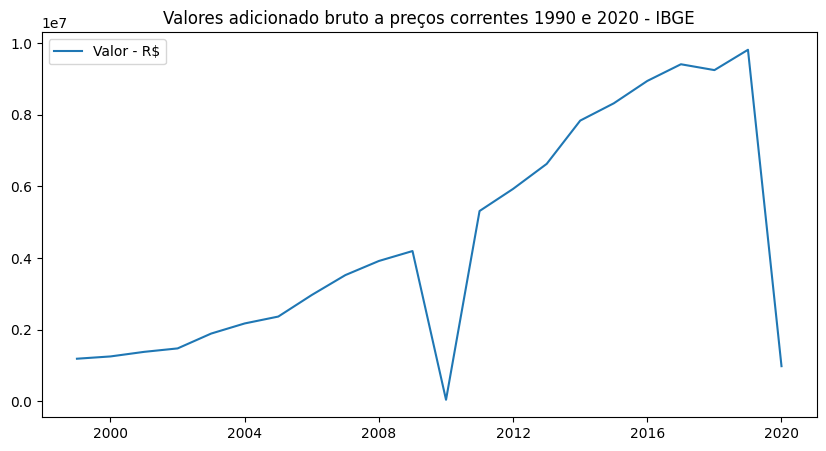

In [733]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['va'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Valores adicionado bruto a preços correntes 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

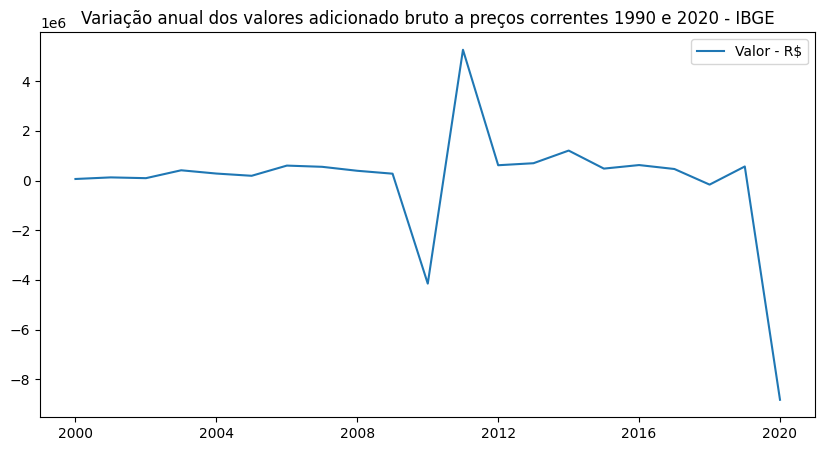

In [734]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['variacao_anual_va'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação anual dos valores adicionado bruto a preços correntes 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

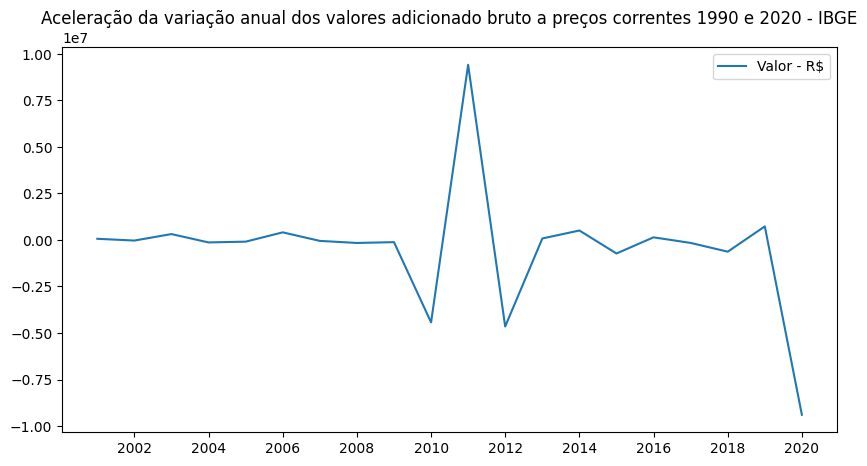

In [735]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['aceleracao_variacao_anual_va'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração da variação anual dos valores adicionado bruto a preços correntes 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

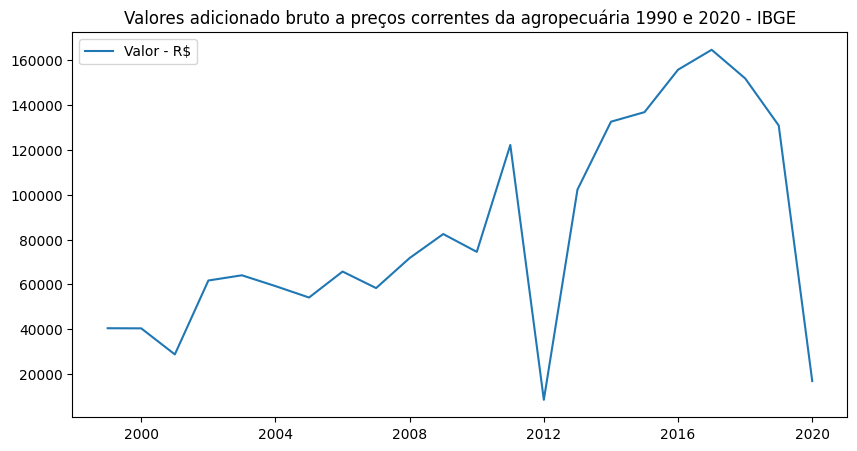

In [736]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['va_agropecuaria'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Valores adicionado bruto a preços correntes da agropecuária 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

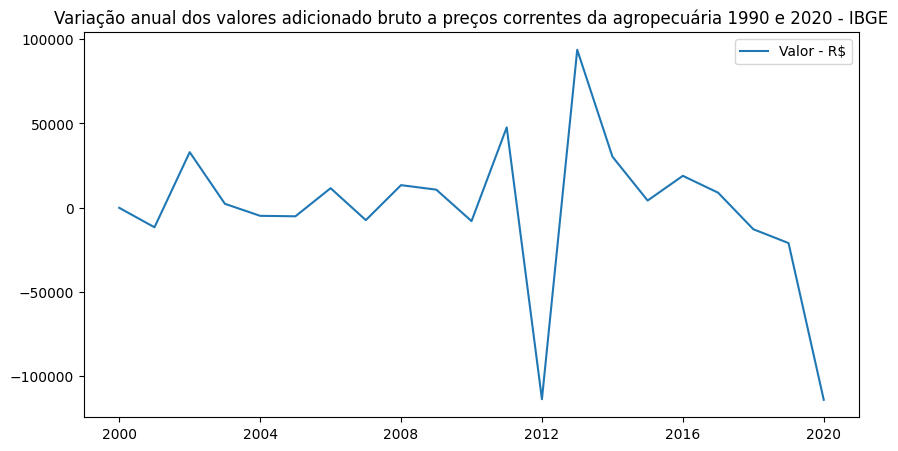

In [737]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['variacao_anual_va_agropecuaria'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação anual dos valores adicionado bruto a preços correntes da agropecuária 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

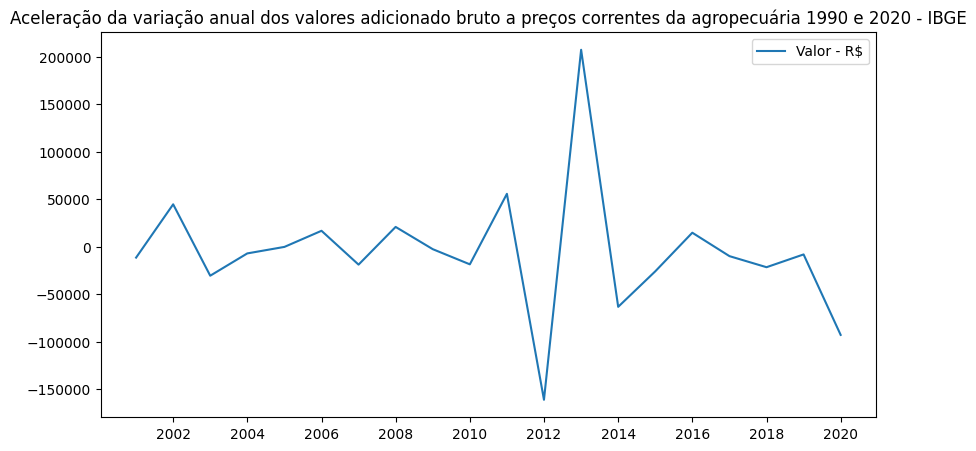

In [738]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['aceleracao_variacao_anual_va_agropecuaria'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração da variação anual dos valores adicionado bruto a preços correntes da agropecuária 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

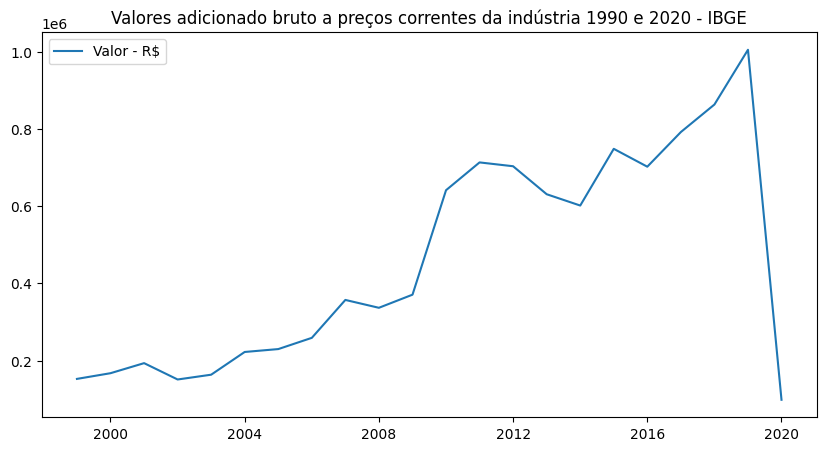

In [739]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['va_industria'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Valores adicionado bruto a preços correntes da indústria 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

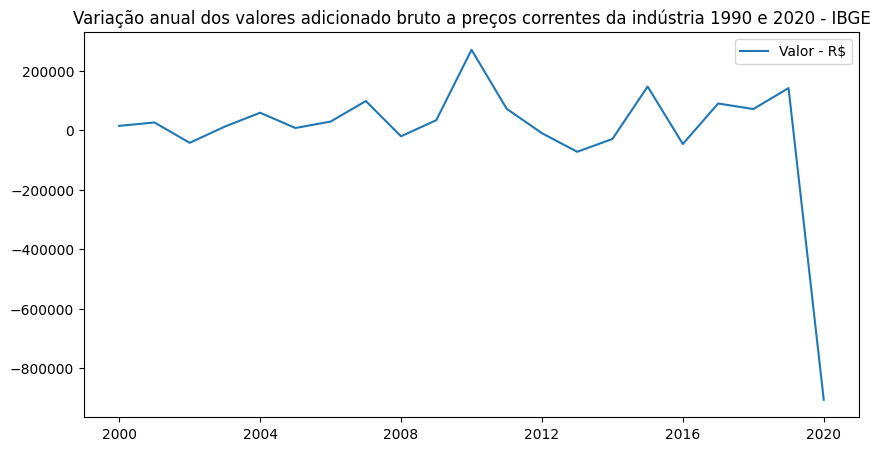

In [740]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['variacao_anual_va_industria'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação anual dos valores adicionado bruto a preços correntes da indústria 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

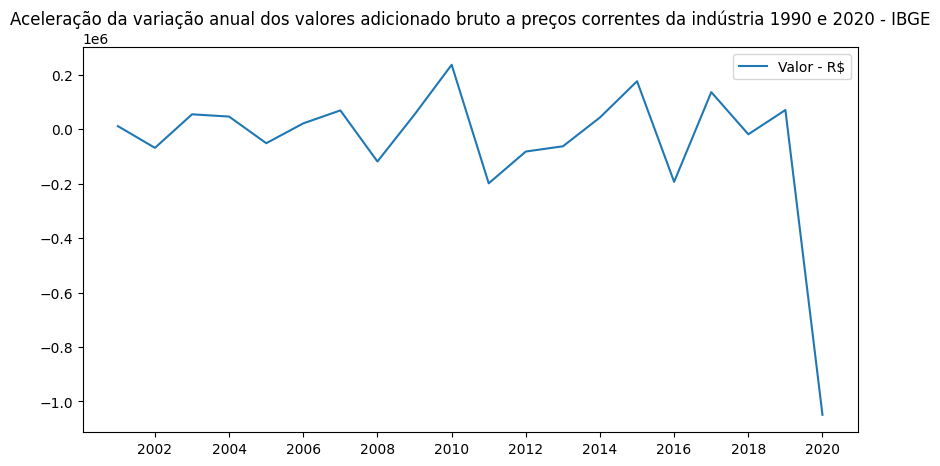

In [741]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['aceleracao_variacao_anual_va_industria'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração da variação anual dos valores adicionado bruto a preços correntes da indústria 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

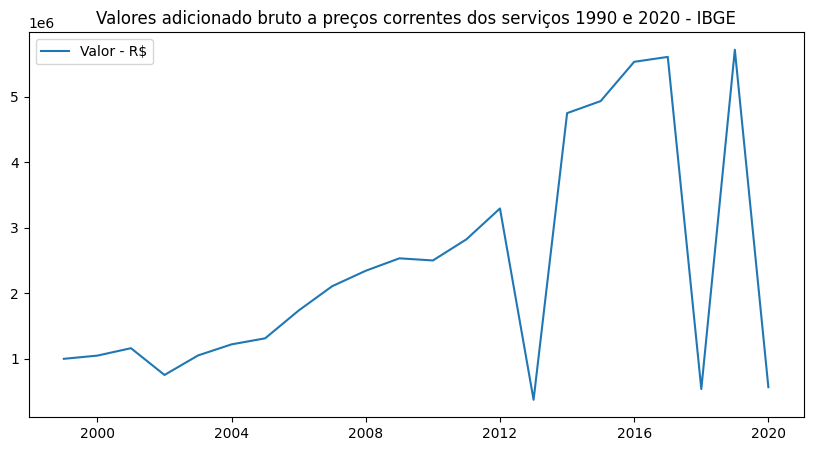

In [742]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['va_servicos'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Valores adicionado bruto a preços correntes dos serviços 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

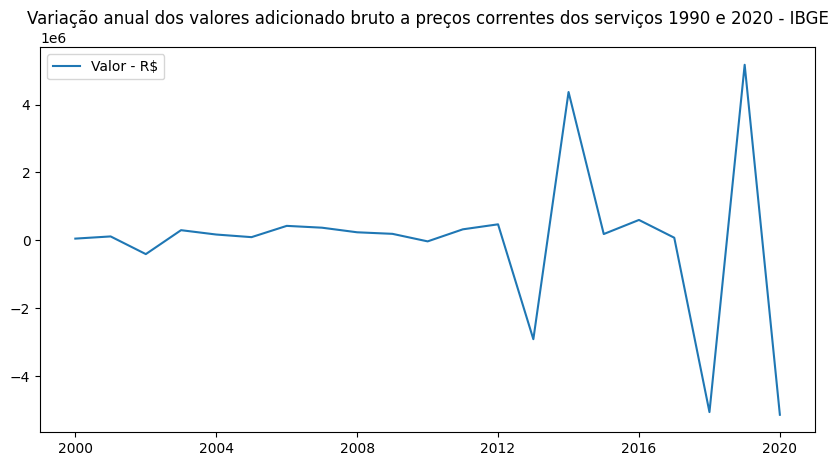

In [743]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['variacao_anual_va_servicos'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação anual dos valores adicionado bruto a preços correntes dos serviços 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

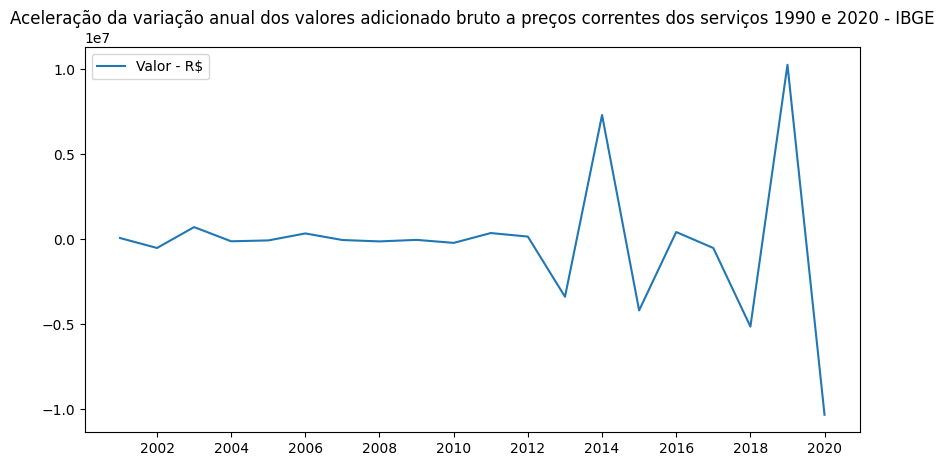

In [744]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['aceleracao_variacao_anual_va_servicos'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração da variação anual dos valores adicionado bruto a preços correntes dos serviços 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

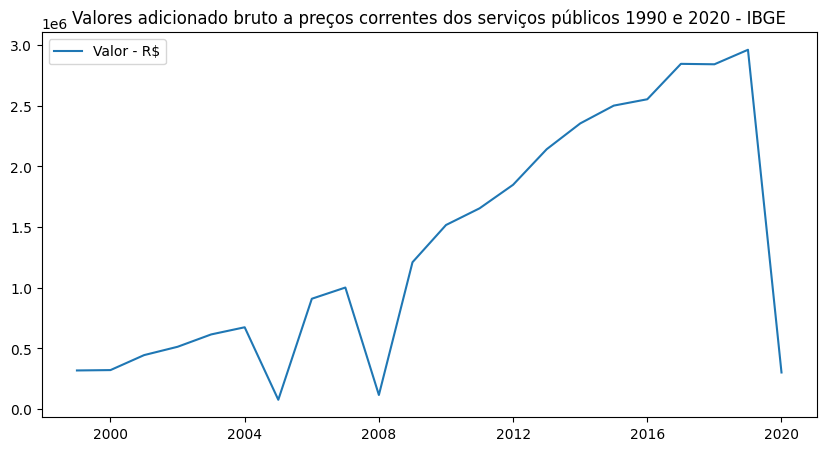

In [745]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['va_adespss'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Valores adicionado bruto a preços correntes dos serviços públicos 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

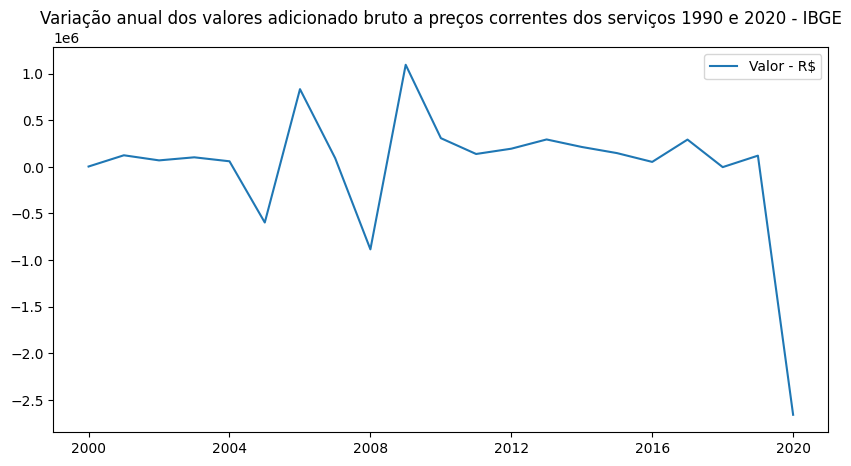

In [746]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['variacao_anual_va_adespss'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação anual dos valores adicionado bruto a preços correntes dos serviços públicos 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

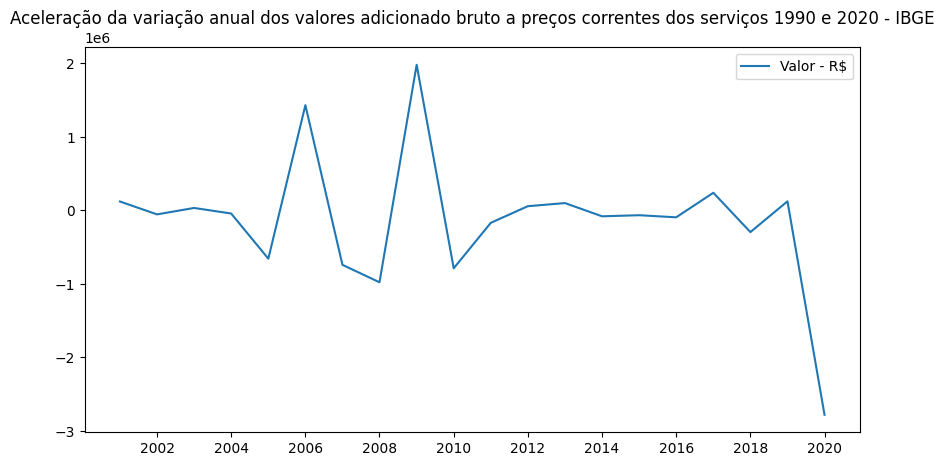

In [747]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['aceleracao_variacao_anual_va_adespss'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração da variação anual dos valores adicionado bruto a preços correntes dos serviços públicos 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

### Time series das receitas

#### Por meses

In [748]:
# verificando se há valores nulos
df_receitas.isna().value_counts()

COD_RECEITA  DATA   COD_CONTRIBUINTE  VALOR_ARRECADADO  FONTE_DADOS
False        False  False             False             False          102293
dtype: int64

In [749]:
df_receitas.dtypes

COD_RECEITA                  int64
DATA                datetime64[ns]
COD_CONTRIBUINTE            object
VALOR_ARRECADADO           float64
FONTE_DADOS                 object
dtype: object

In [750]:
# criando df para analises dos dados
df_receitas_analise = df_receitas[['DATA','VALOR_ARRECADADO']]

# criando coluna mês-ano para agrupar os dados
df_receitas_analise['mes_ano'] = pd.to_datetime(df_receitas_analise['DATA'].dt.strftime("%m-%Y"))

# agrupando os dados no df e deletando coluna das datas
df_receitas_analise.drop(columns=('DATA'), inplace=True)
df_receitas_analise = df_receitas_analise.groupby('mes_ano').sum()
df_receitas_analise

,VALOR_ARRECADADO
mes_ano,
2013-01-01,5865563.10
2013-02-01,6979863.94
2013-03-01,6038308.84
2013-04-01,6036720.77
2013-05-01,6566028.25
...,...
2022-08-01,15546474.80
2022-09-01,14755666.11
2022-10-01,13494171.35


In [751]:
df_receitas_analise['variacao_mensal'] = df_receitas_analise['VALOR_ARRECADADO'].diff()
df_receitas_analise['porcentagem_variacao_mensal_%'] = ((df_receitas_analise['variacao_mensal'] / df_receitas_analise['VALOR_ARRECADADO'].shift(1)) * 100).round(2)
df_receitas_analise['aceleracao_variacao_mensal'] = df_receitas_analise['variacao_mensal'].diff()
df_receitas_analise['porcentagem_aceleracao_variacao_mensal_%'] = ((df_receitas_analise['aceleracao_variacao_mensal'] / df_receitas_analise['variacao_mensal'].shift(1)) * 100).round(2)
df_receitas_analise

,VALOR_ARRECADADO,variacao_mensal,porcentagem_variacao_mensal_%,aceleracao_variacao_mensal,porcentagem_aceleracao_variacao_mensal_%
mes_ano,,,,,
2013-01-01,5865563.10,NaN,NaN,NaN,NaN
2013-02-01,6979863.94,1114300.84,19.00,NaN,NaN
2013-03-01,6038308.84,-941555.10,-13.49,-2055855.94,-184.50
2013-04-01,6036720.77,-1588.07,-0.03,939967.03,-99.83
2013-05-01,6566028.25,529307.48,8.77,530895.55,-33430.24
...,...,...,...,...,...
2022-08-01,15546474.80,-5207873.52,-25.09,-1413654.65,37.26
2022-09-01,14755666.11,-790808.69,-5.09,4417064.83,-84.82
2022-10-01,13494171.35,-1261494.76,-8.55,-470686.07,59.52


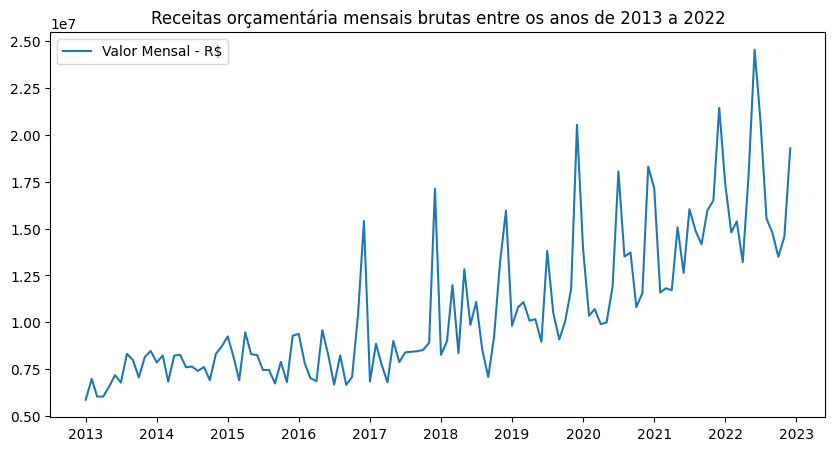

In [752]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_receitas_analise.index, df_receitas_analise['VALOR_ARRECADADO'], label='Valor Mensal - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Receitas orçamentária mensais brutas entre os anos de 2013 a 2022')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

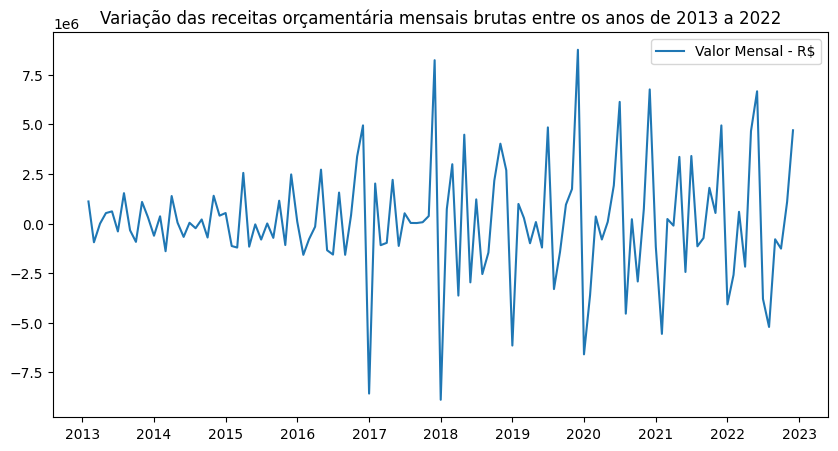

In [753]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_receitas_analise.index, df_receitas_analise['variacao_mensal'], label='Valor Mensal - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação das receitas orçamentária mensais brutas entre os anos de 2013 a 2022')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

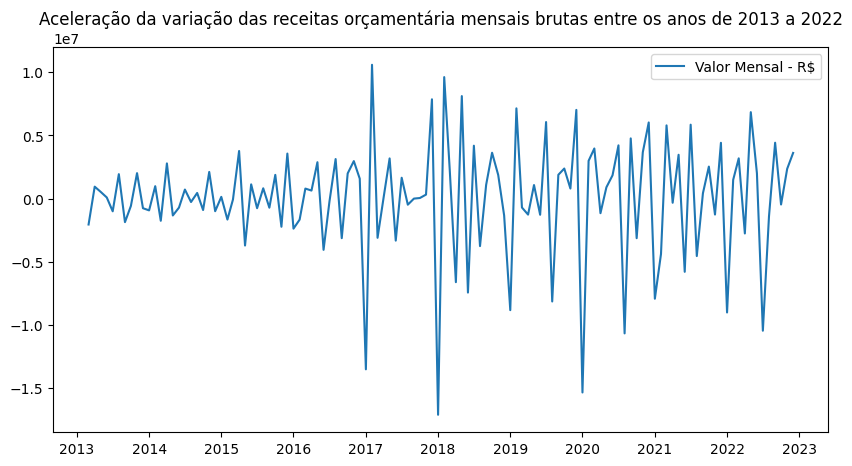

In [754]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_receitas_analise.index, df_receitas_analise['aceleracao_variacao_mensal'], label='Valor Mensal - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração da variação das receitas orçamentária mensais brutas entre os anos de 2013 a 2022')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

In [755]:
print(f"Total da variação das receitas mensais: R$ {df_receitas_analise['variacao_mensal'].sum().round(2)}")
print(f"Média móvel mensal da variação das receitas: R$ {(df_receitas_analise['variacao_mensal'].sum()/df_receitas_analise.shape[0]).round(2)}")

Total da variação das receitas mensais: R$ 13421972.82
Média móvel mensal da variação das receitas: R$ 111849.77


In [756]:
print(f"Total da aceleração da variação das receitas mensais: R$ {df_receitas_analise['aceleracao_variacao_mensal'].sum().round(2)}")
print(f"Média móvel mensal da aceleração da variação das receitas: R$ {(df_receitas_analise['aceleracao_variacao_mensal'].sum()/df_receitas_analise.shape[0]).round(2)}")

Total da aceleração da variação das receitas mensais: R$ 3586678.31
Média móvel mensal da aceleração da variação das receitas: R$ 29888.99


In [757]:
print(f"Porcentagem da variação das receitas mensais: {df_receitas_analise['porcentagem_variacao_mensal_%'].sum().round(2)}%")
print(f"Média movel percentual mensal da variação das receitas: {(df_receitas_analise['porcentagem_variacao_mensal_%'].sum()/df_receitas_analise.shape[0]).round(2)}%")

Porcentagem da variação das receitas mensais: 446.74%
Média movel percentual mensal da variação das receitas: 3.72%


In [758]:
print(f"Porcentagem da aceleração da variação das receitas mensais: {df_receitas_analise['porcentagem_aceleracao_variacao_mensal_%'].sum().round(2)}%")
print(f"Média móvel percentual mensal da acelereção variação das receitas: {(df_receitas_analise['porcentagem_aceleracao_variacao_mensal_%'].sum()/df_receitas_analise.shape[0]).round(2)}%")

Porcentagem da aceleração da variação das receitas mensais: -62985.94%
Média móvel percentual mensal da acelereção variação das receitas: -524.88%


#### Por ano

In [759]:
# criando df para analises dos dados
df_receitas_analise = df_receitas[['DATA','VALOR_ARRECADADO']]

# criando coluna mês-ano para agrupar os dados
df_receitas_analise['ano'] = pd.to_datetime(df_receitas_analise['DATA'].dt.strftime("%Y"))

# agrupando os dados no df e deletando coluna das datas
df_receitas_analise.drop(columns=('DATA'), inplace=True)
df_receitas_analise = df_receitas_analise.groupby('ano').sum().round(2)

# Mostrar os valores com 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format
print(df_receitas_analise)

            VALOR_ARRECADADO
ano                         
2013-01-01       85429787.25
2014-01-01       93620836.34
2015-01-01       95923044.11
2016-01-01      103399262.43
2017-01-01      106984059.44
2018-01-01      125478351.59
2019-01-01      136691716.11
2020-01-01      152785541.14
2021-01-01      179003057.61
2022-01-01      201644040.94


In [760]:
df_receitas_analise['variacao_anual'] = df_receitas_analise['VALOR_ARRECADADO'].diff()
df_receitas_analise['porcentagem_variacao_anual_%'] = ((df_receitas_analise['variacao_anual'] / df_receitas_analise['VALOR_ARRECADADO'].shift(1)) * 100).round(2)
df_receitas_analise['aceleracao_variacao_anual'] = df_receitas_analise['variacao_anual'].diff()
df_receitas_analise['porcentagem_aceleracao_variacao_anual_%'] = ((df_receitas_analise['aceleracao_variacao_anual'] / df_receitas_analise['variacao_anual'].shift(1)) * 100).round(2)
df_receitas_analise

,VALOR_ARRECADADO,variacao_anual,porcentagem_variacao_anual_%,aceleracao_variacao_anual,porcentagem_aceleracao_variacao_anual_%
ano,,,,,
2013-01-01,85429787.25,NaN,NaN,NaN,NaN
2014-01-01,93620836.34,8191049.09,9.59,NaN,NaN
2015-01-01,95923044.11,2302207.77,2.46,-5888841.32,-71.89
2016-01-01,103399262.43,7476218.32,7.79,5174010.55,224.74
2017-01-01,106984059.44,3584797.01,3.47,-3891421.31,-52.05
2018-01-01,125478351.59,18494292.15,17.29,14909495.14,415.91
2019-01-01,136691716.11,11213364.52,8.94,-7280927.63,-39.37
2020-01-01,152785541.14,16093825.03,11.77,4880460.51,43.52
2021-01-01,179003057.61,26217516.47,17.16,10123691.44,62.90


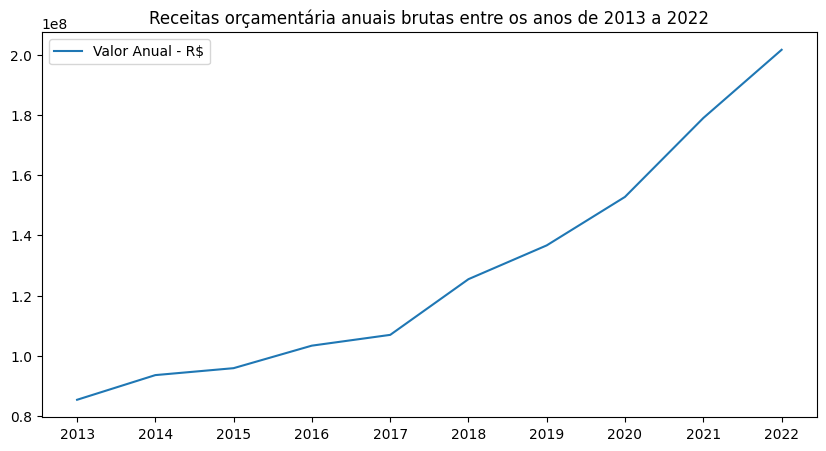

In [761]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_receitas_analise.index, df_receitas_analise['VALOR_ARRECADADO'], label='Valor Anual - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Receitas orçamentária anuais brutas entre os anos de 2013 a 2022')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

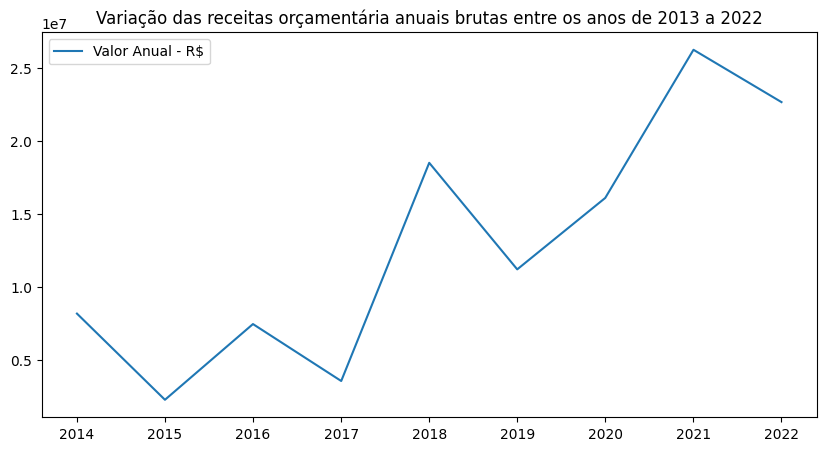

In [762]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_receitas_analise.index, df_receitas_analise['variacao_anual'], label='Valor Anual - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação das receitas orçamentária anuais brutas entre os anos de 2013 a 2022')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

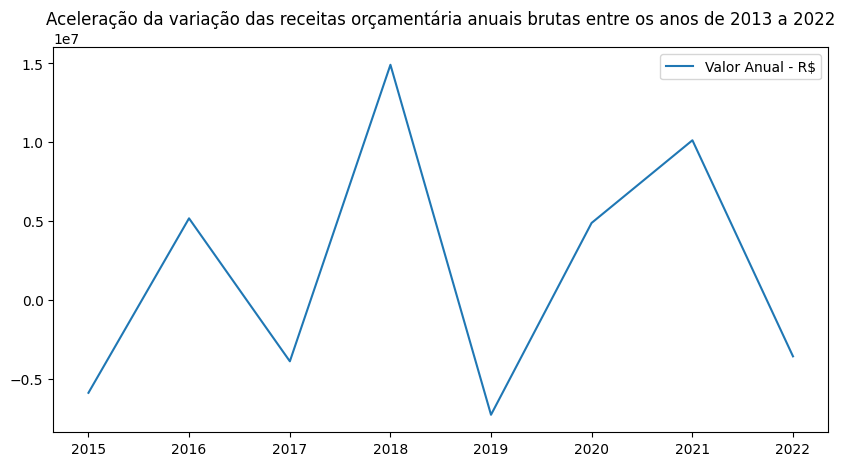

In [763]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_receitas_analise.index, df_receitas_analise['aceleracao_variacao_anual'], label='Valor Anual - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração da variação das receitas orçamentária anuais brutas entre os anos de 2013 a 2022')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

In [764]:
print(f"Total da variação das receitas anuais: R$ {df_receitas_analise['variacao_anual'].sum().round(2)}")
print(f"Média móvel anual da variação das receitas: R$ {(df_receitas_analise['variacao_anual'].sum()/df_receitas_analise.shape[0]).round(2)}")

Total da variação das receitas anuais: R$ 116214253.69
Média móvel anual da variação das receitas: R$ 11621425.37


In [765]:
print(f"Total da aceleração da variação das receitas anuais: R$ {df_receitas_analise['aceleracao_variacao_anual'].sum().round(2)}")
print(f"Média móvel anual da aceleração da variação das receitas: R$ {(df_receitas_analise['aceleracao_variacao_anual'].sum()/df_receitas_analise.shape[0]).round(2)}")

Total da aceleração da variação das receitas anuais: R$ 14449934.24
Média móvel anual da aceleração da variação das receitas: R$ 1444993.42


In [766]:
print(f"Porcentagem da variação das receitas anuais: {df_receitas_analise['porcentagem_variacao_anual_%'].sum().round(2)}%")
print(f"Média movel percentual anual da variação das receitas: {(df_receitas_analise['porcentagem_variacao_anual_%'].sum()/df_receitas_analise.shape[0]).round(2)}%")

Porcentagem da variação das receitas anuais: 91.12%
Média movel percentual anual da variação das receitas: 9.11%


In [767]:
print(f"Porcentagem da aceleração da variação das receitas anuais: {df_receitas_analise['porcentagem_aceleracao_variacao_anual_%'].sum().round(2)}%")
print(f"Média móvel percentual anual da acelereção variação das receitas: {(df_receitas_analise['porcentagem_aceleracao_variacao_anual_%'].sum()/df_receitas_analise.shape[0]).round(2)}%")

Porcentagem da aceleração da variação das receitas anuais: 570.12%
Média móvel percentual anual da acelereção variação das receitas: 57.01%
